<a href="https://colab.research.google.com/github/mohitbinjhade116/Stock_price_pridiction_project/blob/main/Stock_price_prediction_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline

In [14]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
from google.colab import files
uploaded = files.upload()
print(uploaded)

Saving GOOG.csv to GOOG.csv
{'GOOG.csv': b'Date,Open,High,Low,Close,Adj Close,Volume\n2004-08-19,2.490664,2.591785,2.390042,2.499133,2.499133,897427216\n2004-08-20,2.515820,2.716817,2.503118,2.697639,2.697639,458857488\n2004-08-23,2.758411,2.826406,2.716070,2.724787,2.724787,366857939\n2004-08-24,2.770615,2.779581,2.579581,2.611960,2.611960,306396159\n2004-08-25,2.614201,2.689918,2.587302,2.640104,2.640104,184645512\n2004-08-26,2.613952,2.688672,2.606729,2.687676,2.687676,142572401\n2004-08-27,2.692408,2.705360,2.632383,2.643840,2.643840,124826132\n2004-08-30,2.622171,2.627402,2.540727,2.540727,2.540727,104429967\n2004-08-31,2.547950,2.583068,2.544463,2.549693,2.549693,98825037\n2004-09-01,2.557912,2.564637,2.482445,2.496891,2.496891,183633734\n2004-09-02,2.470490,2.549693,2.464263,2.528273,2.528273,303810504\n2004-09-03,2.514326,2.534002,2.473728,2.490913,2.490913,103538639\n2004-09-07,2.515820,2.540478,2.480951,2.530017,2.530017,117506800\n2004-09-08,2.509095,2.566132,2.503118,2.5479

In [21]:
df = pd.read_csv('/content/GOOG.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,2.490664,2.591785,2.390042,2.499133,2.499133,897427216
1,2004-08-20,2.515820,2.716817,2.503118,2.697639,2.697639,458857488
2,2004-08-23,2.758411,2.826406,2.716070,2.724787,2.724787,366857939
3,2004-08-24,2.770615,2.779581,2.579581,2.611960,2.611960,306396159
4,2004-08-25,2.614201,2.689918,2.587302,2.640104,2.640104,184645512


In [22]:
# view the dimension of df
df.shape

(4858, 7)

In [23]:
# summary of the data sets
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4858 entries, 0 to 4857
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4858 non-null   object 
 1   Open       4858 non-null   float64
 2   High       4858 non-null   float64
 3   Low        4858 non-null   float64
 4   Close      4858 non-null   float64
 5   Adj Close  4858 non-null   float64
 6   Volume     4858 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 265.8+ KB


In [24]:
# descriptive analysis of data sets
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4858.000000,4858.000000,4858.000000,4858.000000,4858.000000,4.858000e+03
mean,41.477174,41.917059,41.055491,41.494404,41.494404,1.189152e+08
std,38.590695,39.031758,38.193016,38.618107,38.618107,1.512424e+08
min,2.470490,2.534002,2.390042,2.490913,2.490913,1.584340e+05
25%,12.846597,12.954195,12.712414,12.834642,12.834642,2.854912e+07
50%,26.499958,26.728268,26.289323,26.537501,26.537501,6.168836e+07
75%,57.367250,58.028500,56.962251,57.611249,57.611249,1.467329e+08
max,151.863495,152.100006,149.887497,150.709000,150.709000,1.650833e+09


In [26]:
# checking the null values
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [25]:
# checking the null valuse
df.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


Text(0, 0.5, 'count')

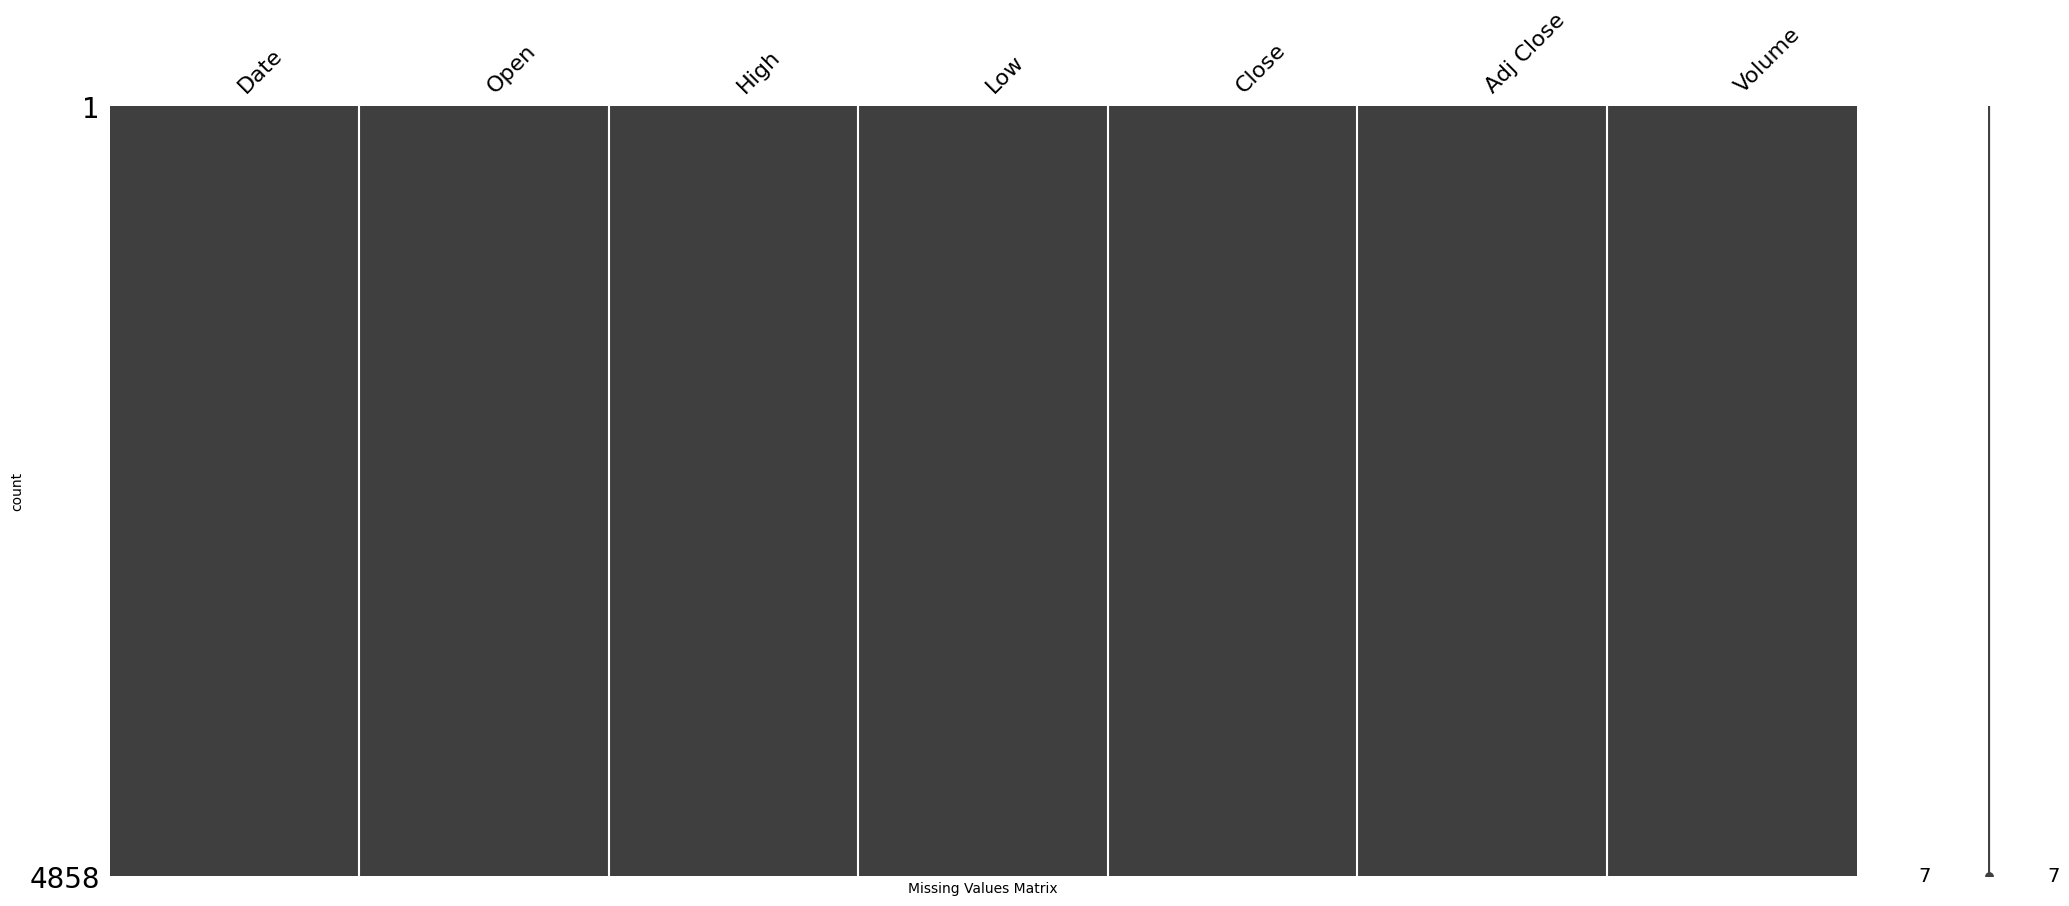

In [27]:
# visualize the Missing data
import missingno as msno
msno.matrix(df)
plt.xlabel("Missing Values Matrix")
plt.ylabel("count")

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4858 entries, 0 to 4857
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4858 non-null   object 
 1   Open       4858 non-null   float64
 2   High       4858 non-null   float64
 3   Low        4858 non-null   float64
 4   Close      4858 non-null   float64
 5   Adj Close  4858 non-null   float64
 6   Volume     4858 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 265.8+ KB


In [31]:
stockprice_one_year = df[(df['Date']>'2023-03-31')&(df['Date']<'2024-04-01')]
stockprice_one_year

,Date,Open,High,Low,Close,Adj Close,Volume
4687,2023-04-03,102.669998,104.949997,102.379997,104.910004,104.910004,20719900
4688,2023-04-04,104.839996,106.099998,104.599998,105.120003,105.120003,20377200
4689,2023-04-05,106.120003,106.540001,104.101997,104.949997,104.949997,21864200
4690,2023-04-06,105.769997,109.629997,104.815002,108.900002,108.900002,34684200
4691,2023-04-10,107.389999,107.970001,105.599998,106.949997,106.949997,19741500
...,...,...,...,...,...,...,...
4853,2023-11-29,138.985001,139.669998,136.294998,136.399994,136.399994,21014700
4854,2023-11-30,136.399994,136.960007,132.789993,133.919998,133.919998,29913500
4855,2023-12-01,133.320007,133.500000,132.151993,133.320007,133.320007,24258400
4856,2023-12-04,131.294006,131.449997,129.399994,130.630005,130.630005,24117100


In [32]:
stockprice_one_year.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


In [33]:
stockprice_one_year.describe()

,Open,High,Low,Close,Adj Close,Volume
count,171.000000,171.000000,171.000000,171.000000,171.000000,1.710000e+02
mean,125.976795,127.439193,124.820713,126.167339,126.167339,2.321645e+07
std,10.564533,10.492989,10.476138,10.480448,10.480448,8.276261e+06
min,102.669998,104.949997,102.379997,104.449997,104.449997,8.828600e+06
25%,120.880001,122.500000,119.652500,121.025002,121.025002,1.787105e+07
50%,129.059998,129.830002,127.160004,128.539993,128.539993,2.092630e+07
75%,134.340004,135.930001,132.802498,134.324997,134.324997,2.479870e+07
max,142.160004,142.380005,139.839996,141.699997,141.699997,5.879610e+07


In [34]:
stockprice_one_year.info()

<class 'pandas.core.frame.DataFrame'>
Index: 171 entries, 4687 to 4857
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       171 non-null    object 
 1   Open       171 non-null    float64
 2   High       171 non-null    float64
 3   Low        171 non-null    float64
 4   Close      171 non-null    float64
 5   Adj Close  171 non-null    float64
 6   Volume     171 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 14.8+ KB


<Axes: >

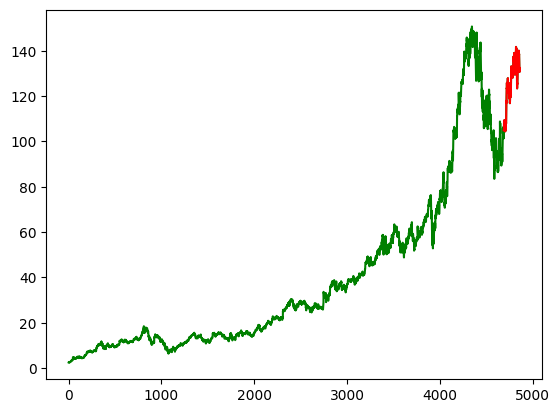

In [35]:
pl =df['Adj Close'].plot(c='green')
stockprice_one_year['Adj Close'].plot(ax=pl, c='red')

<Axes: >

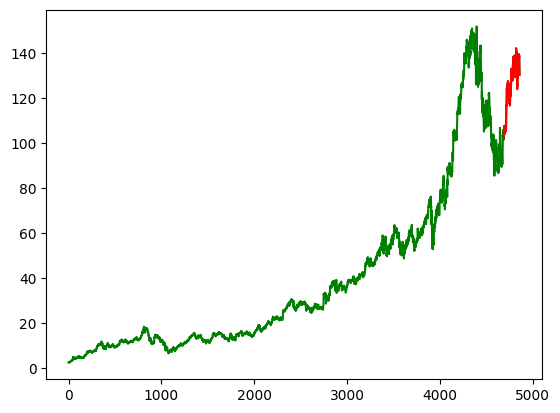

In [36]:
pl =df['Open'].plot(c='green')
stockprice_one_year['Open'].plot(ax=pl, c='red')

<Axes: >

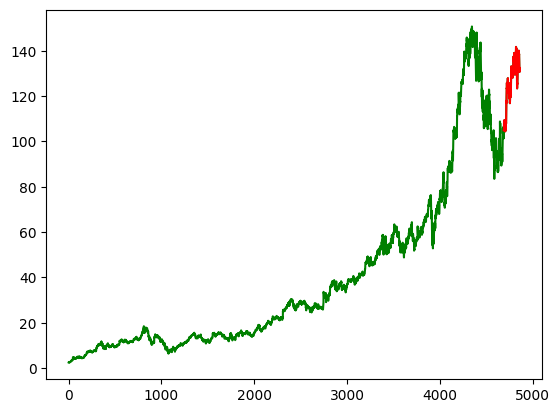

In [37]:
pl =df['Close'].plot(c='green')
stockprice_one_year['Close'].plot(ax=pl, c='red')

<Axes: >

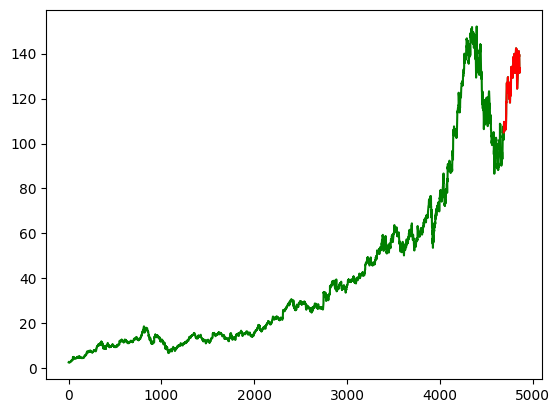

In [38]:
pl =df['High'].plot(c='green')
stockprice_one_year['High'].plot(ax=pl, c='red')

<Axes: >

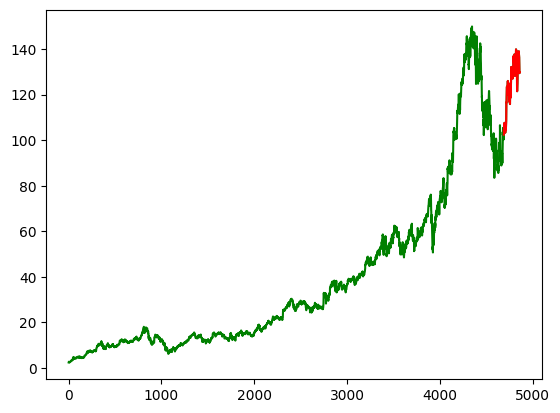

In [39]:
pl =df['Low'].plot(c='green')
stockprice_one_year['Low'].plot(ax=pl, c='red')

<Axes: >

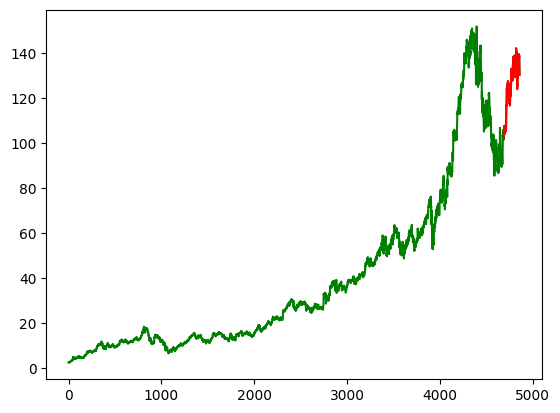

In [42]:
pl =df['Open'].plot(c='green')
stockprice_one_year['Open'].plot(ax=pl, c='red')

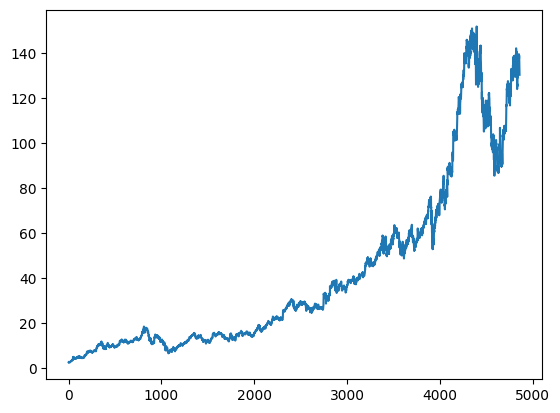

In [43]:
plt.plot(df['Open'])

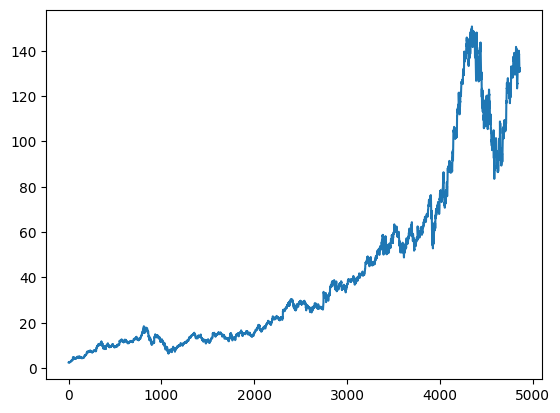

In [44]:
plt.plot(df['Close'])

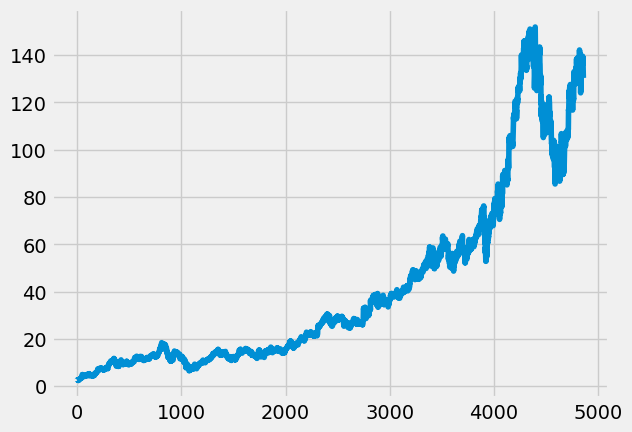

In [46]:
plt.style.use('fivethirtyeight')
plt.plot(df['Open'])

In [48]:
df.select_dtypes(include=np.number).corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999903,0.999896,0.999774,0.999774,-0.471746
High,0.999903,1.000000,0.999875,0.999894,0.999894,-0.470766
Low,0.999896,0.999875,1.000000,0.999904,0.999904,-0.473027
Close,0.999774,0.999894,0.999904,1.000000,1.000000,-0.472017
Adj Close,0.999774,0.999894,0.999904,1.000000,1.000000,-0.472017
Volume,-0.471746,-0.470766,-0.473027,-0.472017,-0.472017,1.000000


<Axes: >

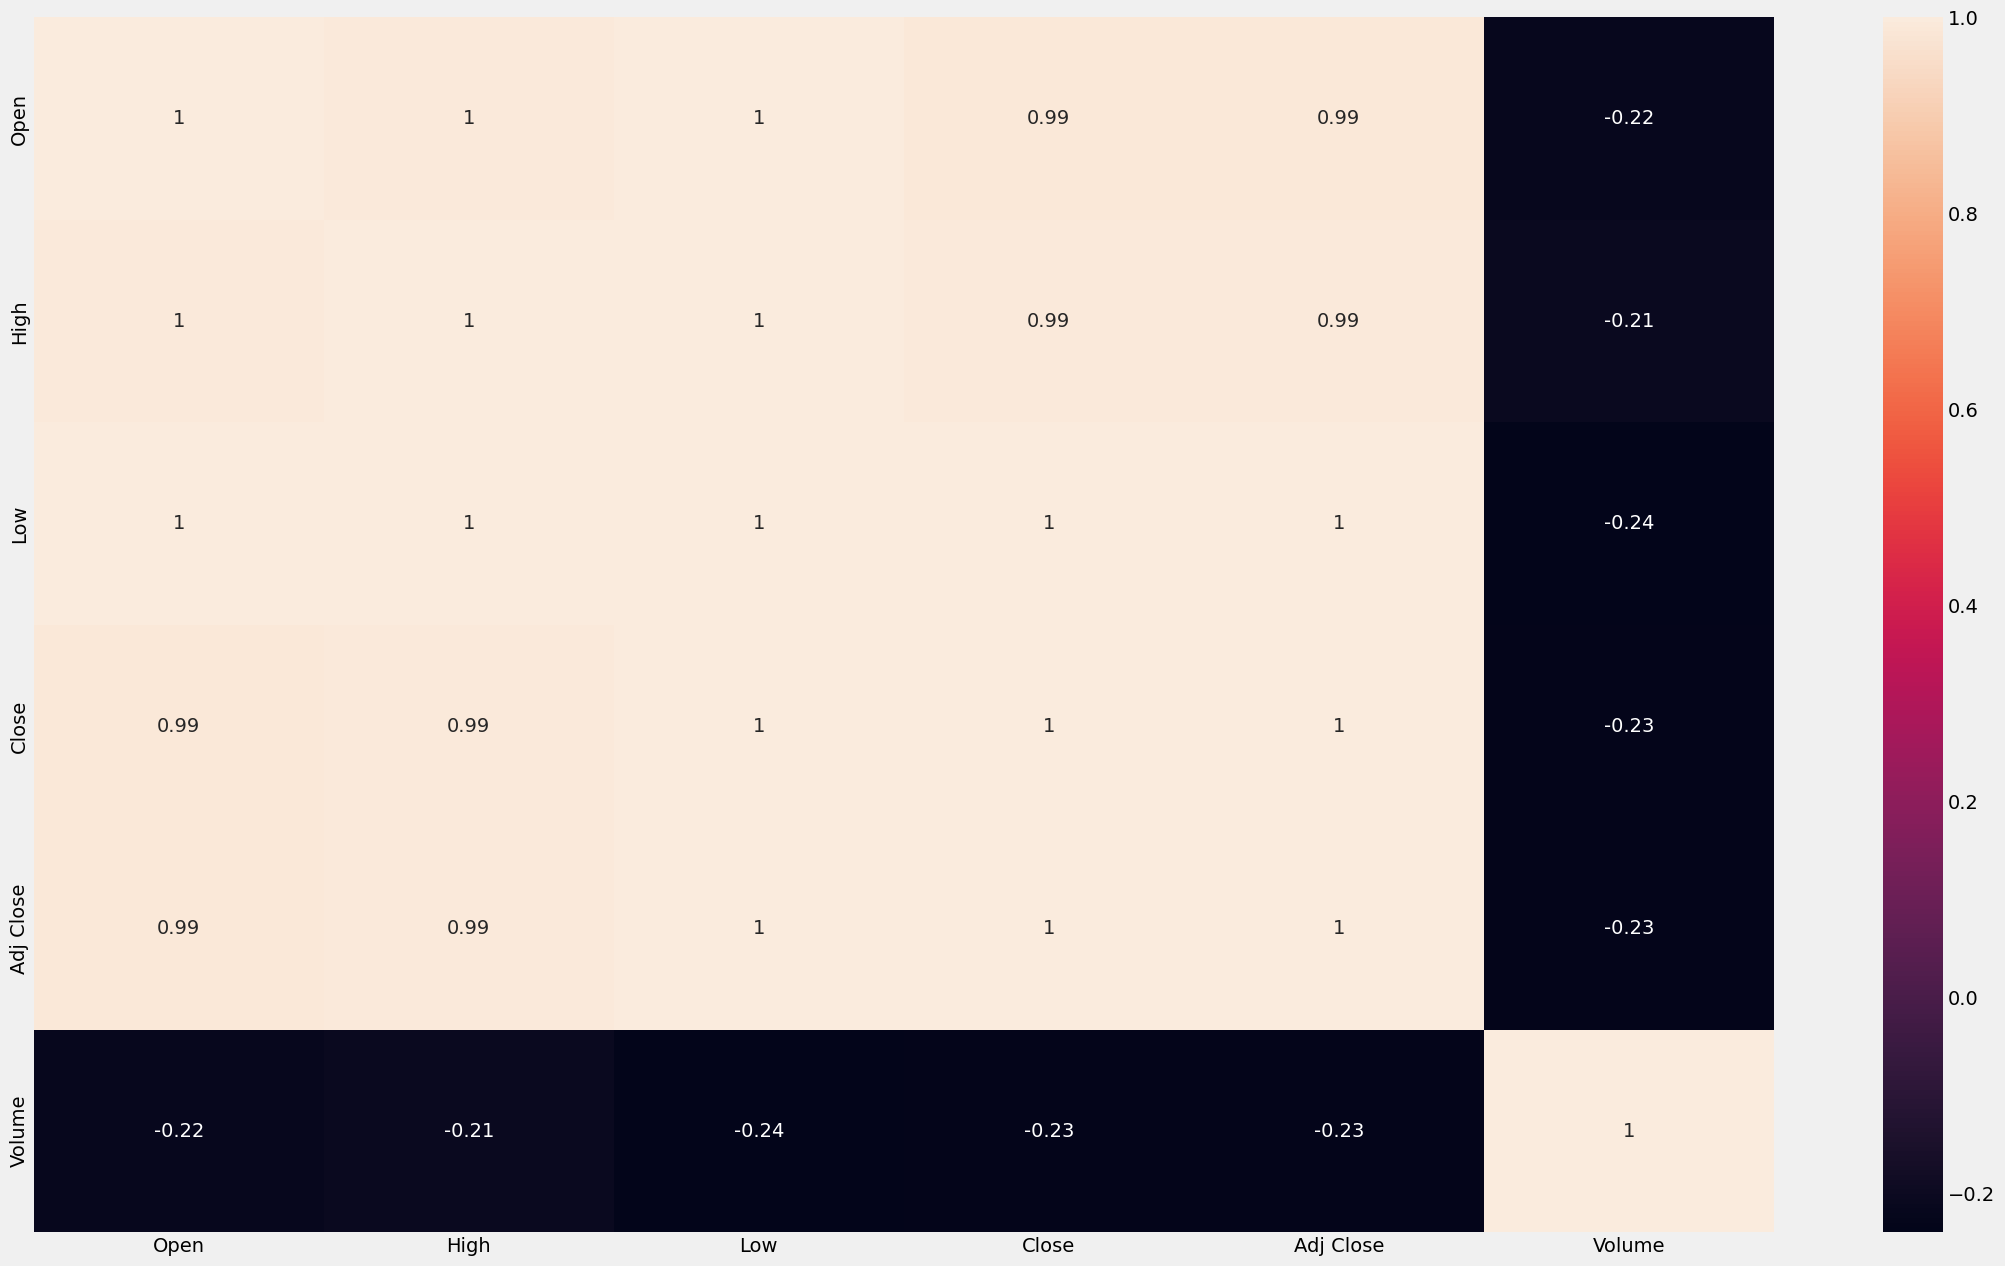

In [100]:
plt.figure(figsize=(25, 15))
sns.heatmap(stockprice_one_year.select_dtypes(include=np.number).corr(method='pearson'),annot=True)

<Axes: xlabel='Date'>

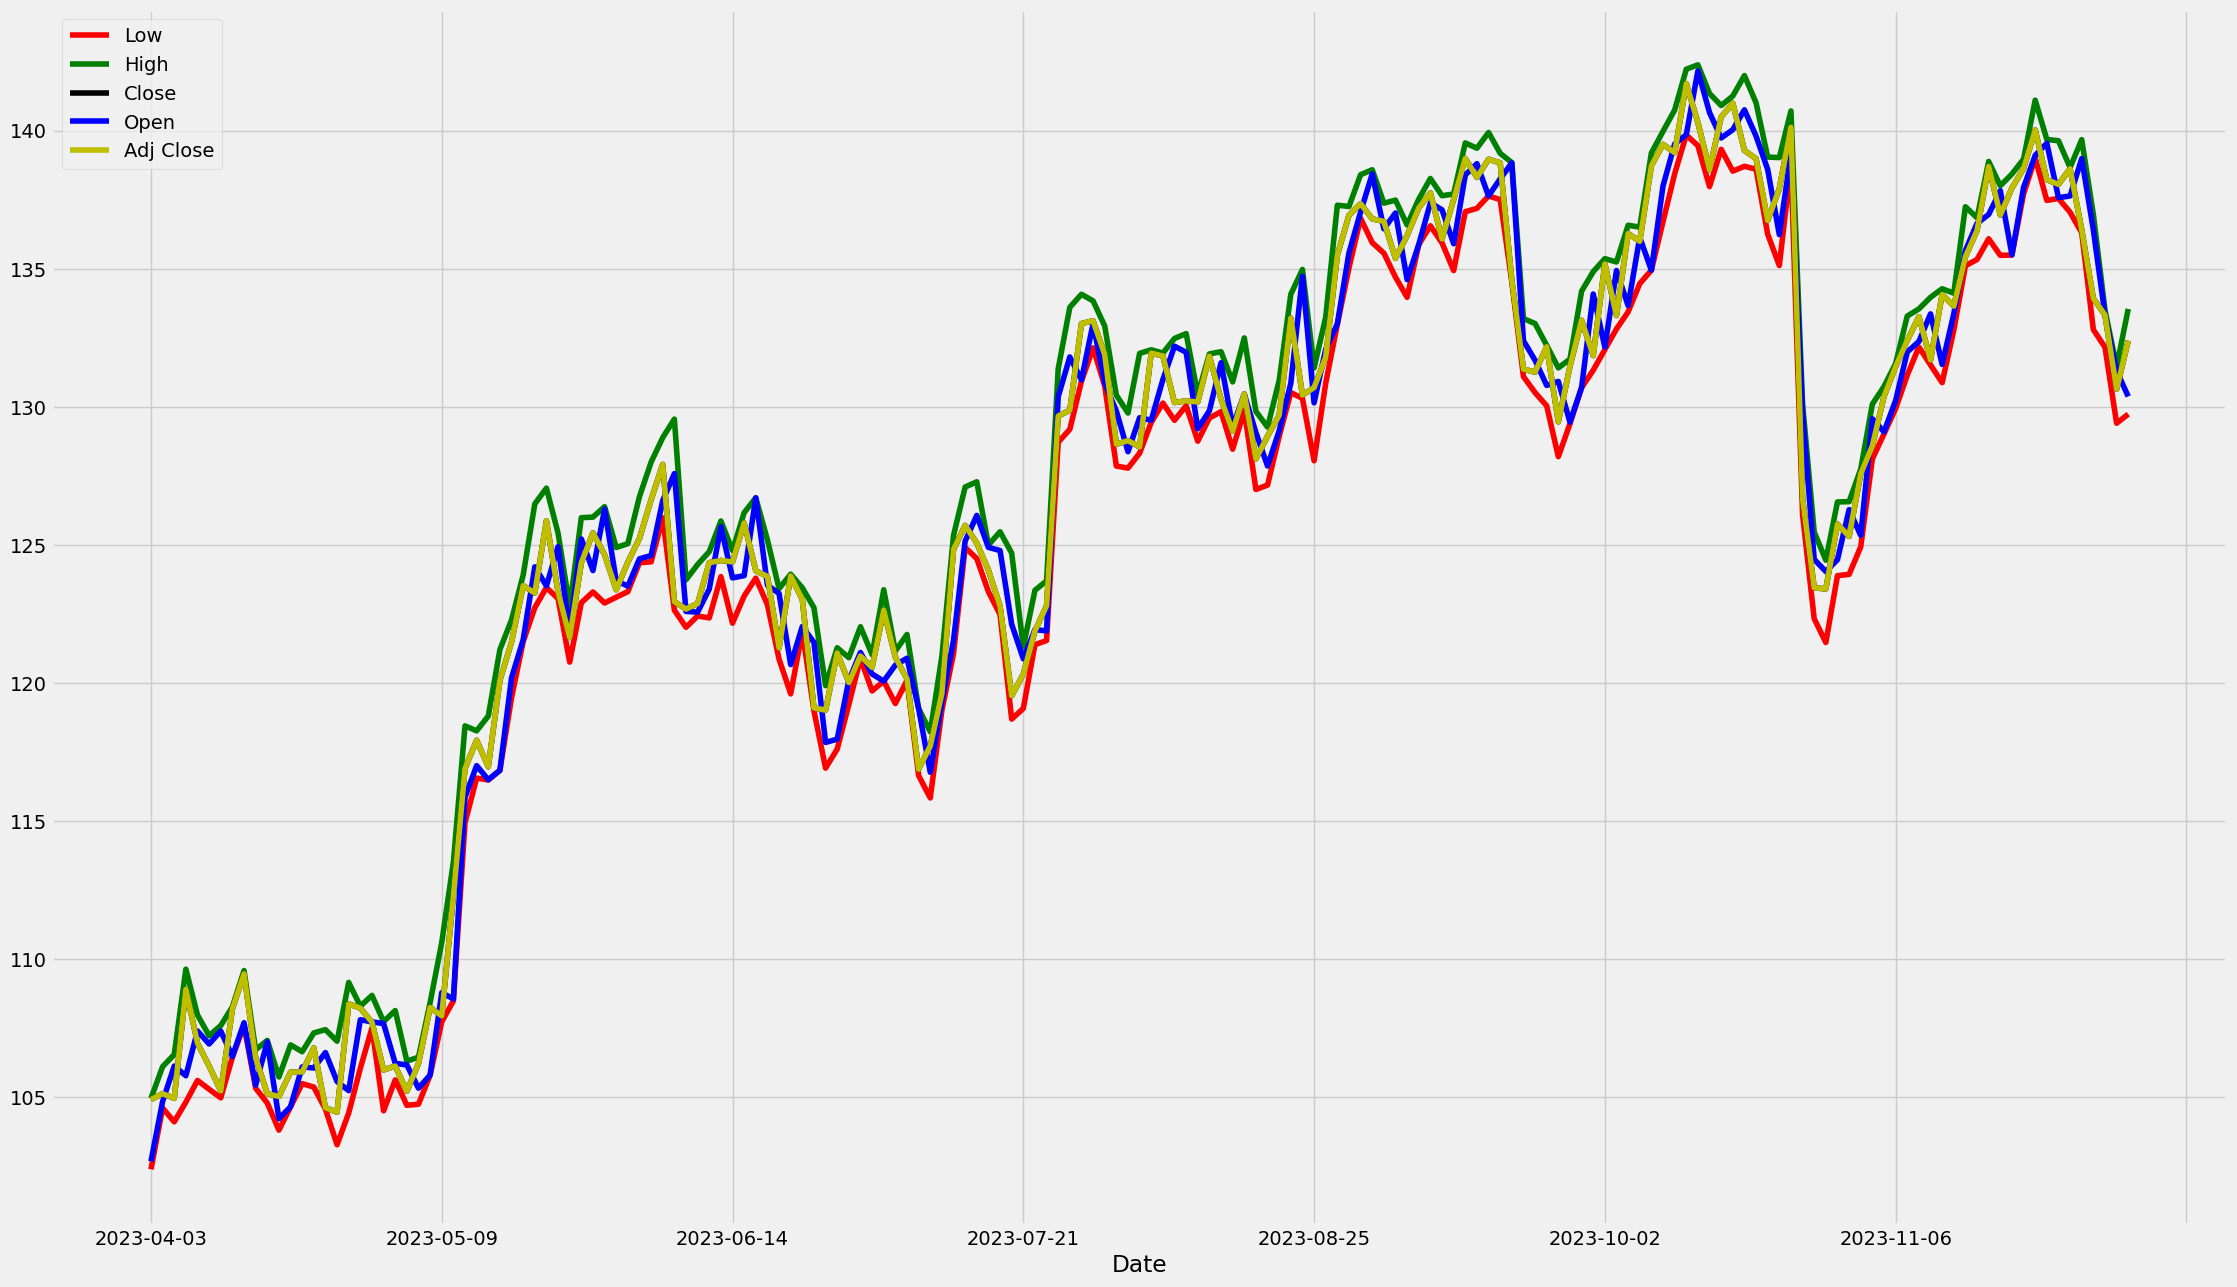

In [56]:
stockprice_one_year.plot(x="Date", y=["Low", "High","Close", "Open", "Adj Close"], color = ['r','g','k','b', 'y'], figsize = [25, 15])

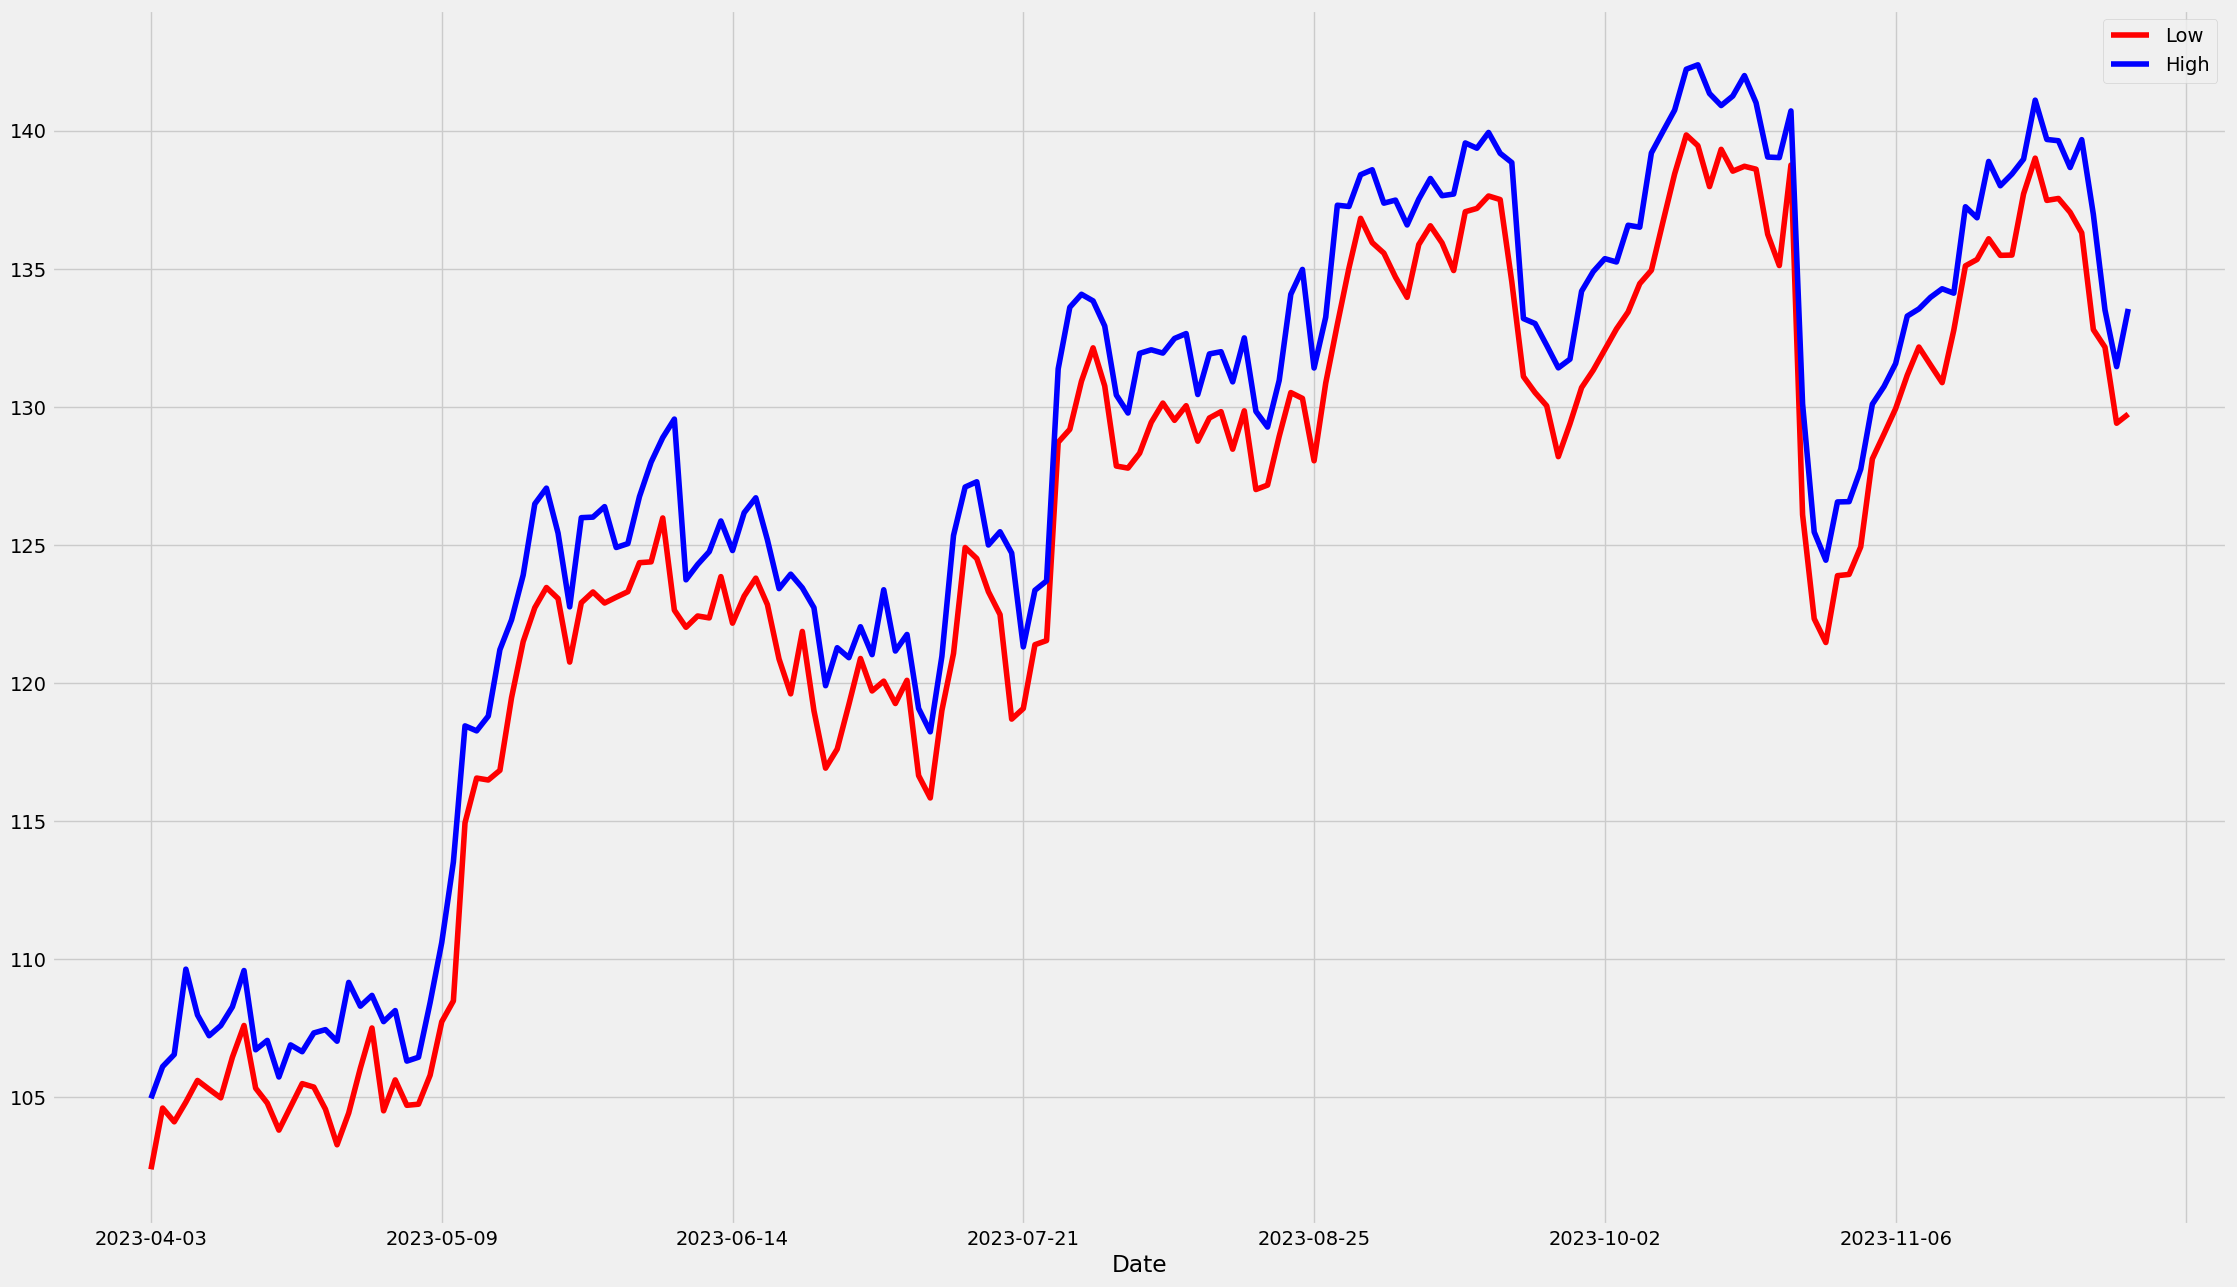

In [57]:
stockprice_one_year.plot(x="Date", y=["Low", "High"], color = ['r','b'], figsize = [25, 15])
plt.show()

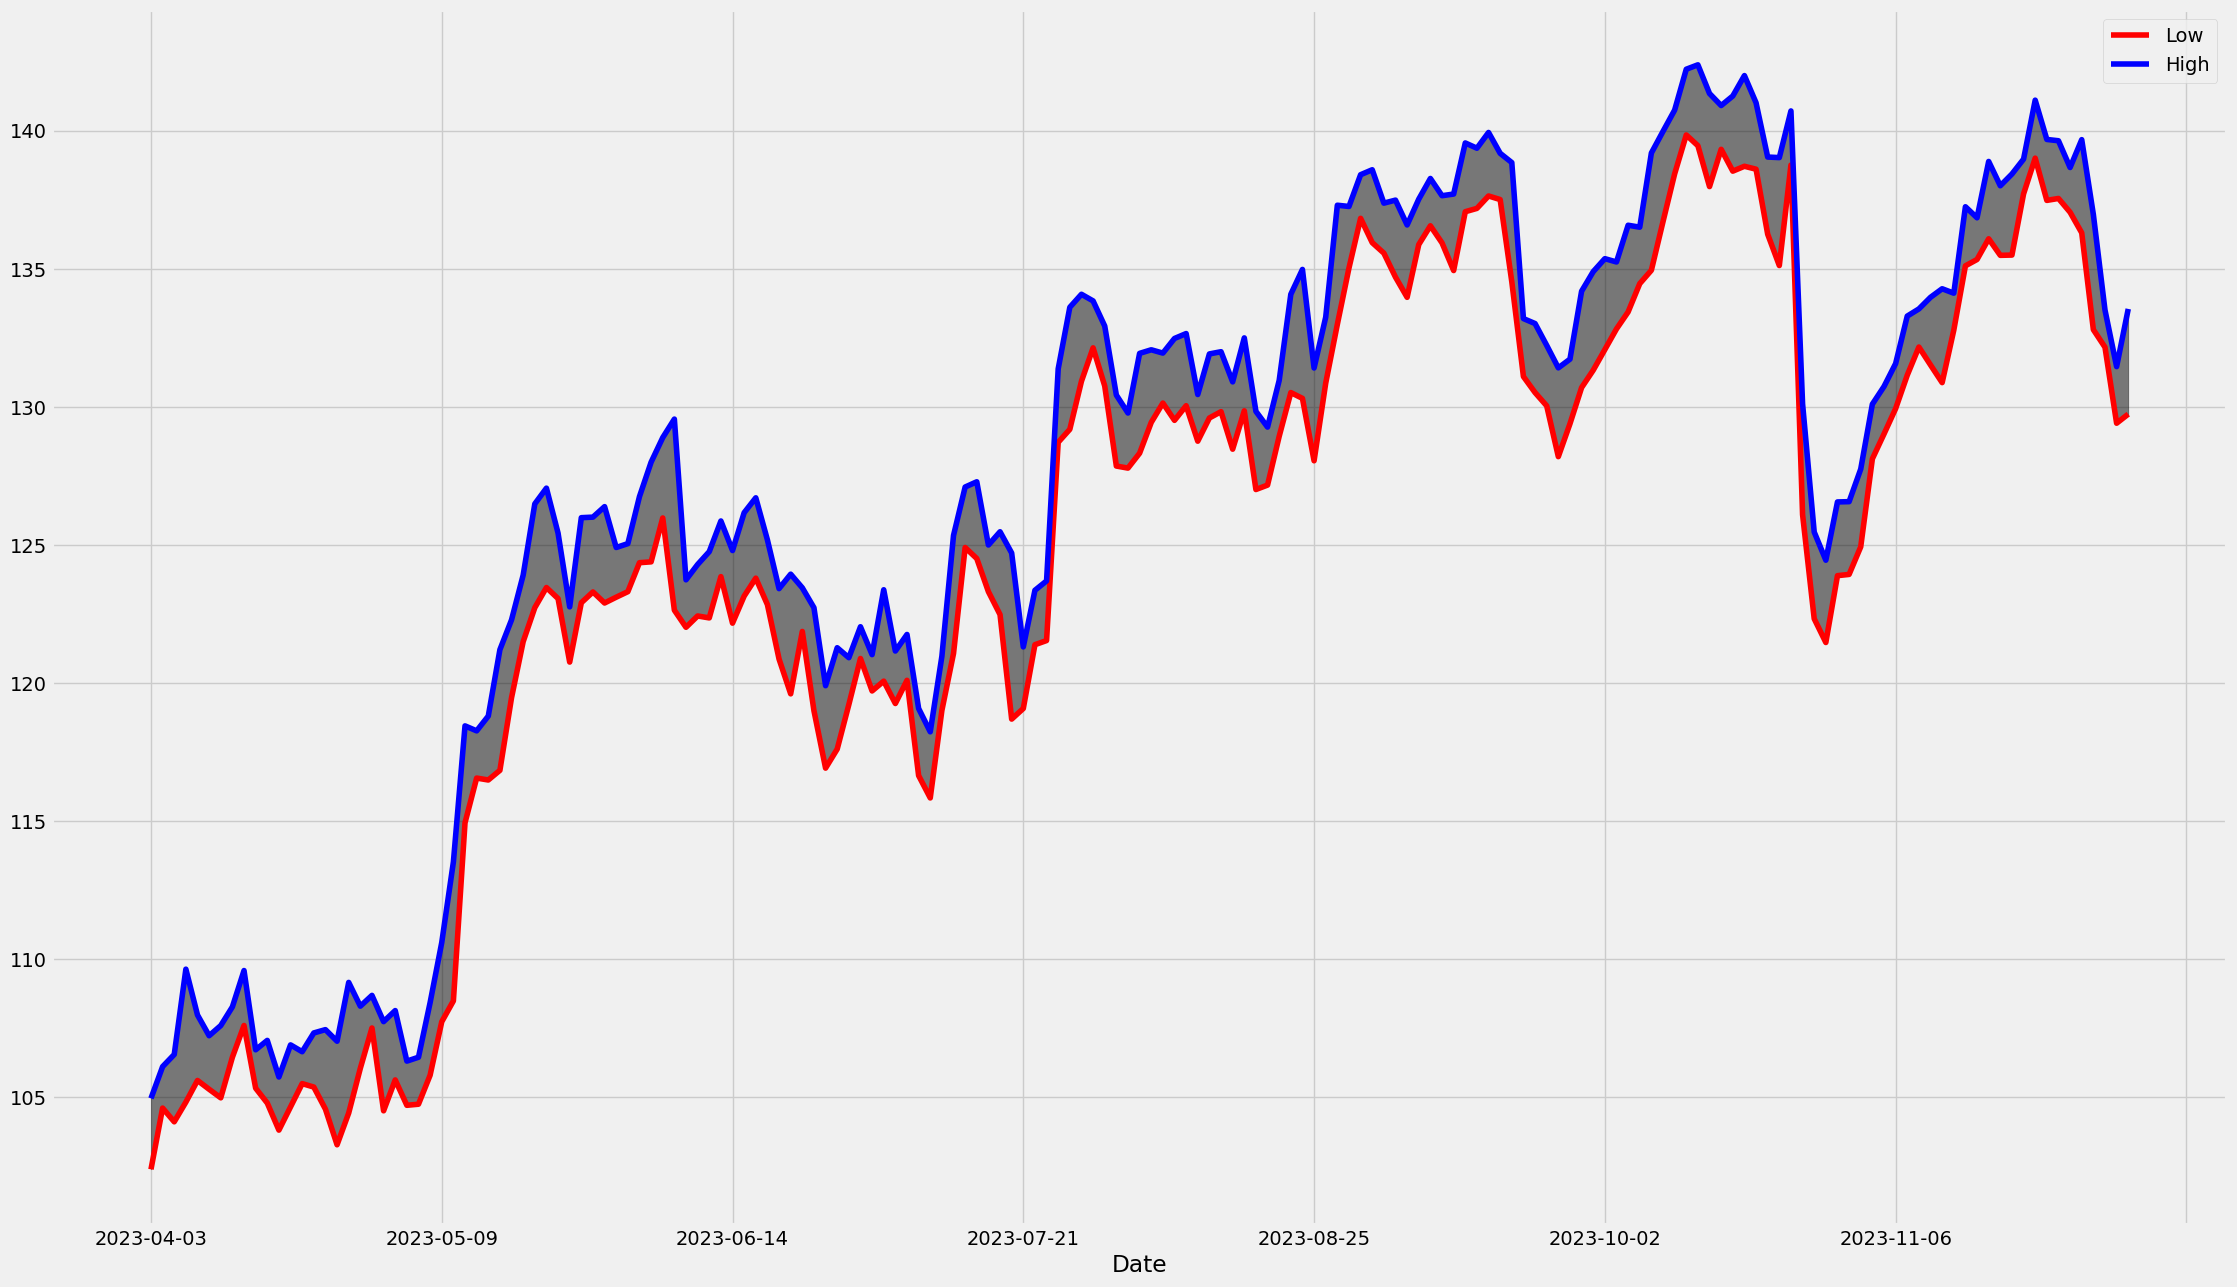

In [60]:
stockprice_one_year.plot(x="Date", y=["Low", "High"], color = ['r','b'], figsize = [25, 15])
plt.fill_between(stockprice_one_year['Date'], stockprice_one_year['Low'], stockprice_one_year['High'], color='k', alpha=0.5)
plt.show()

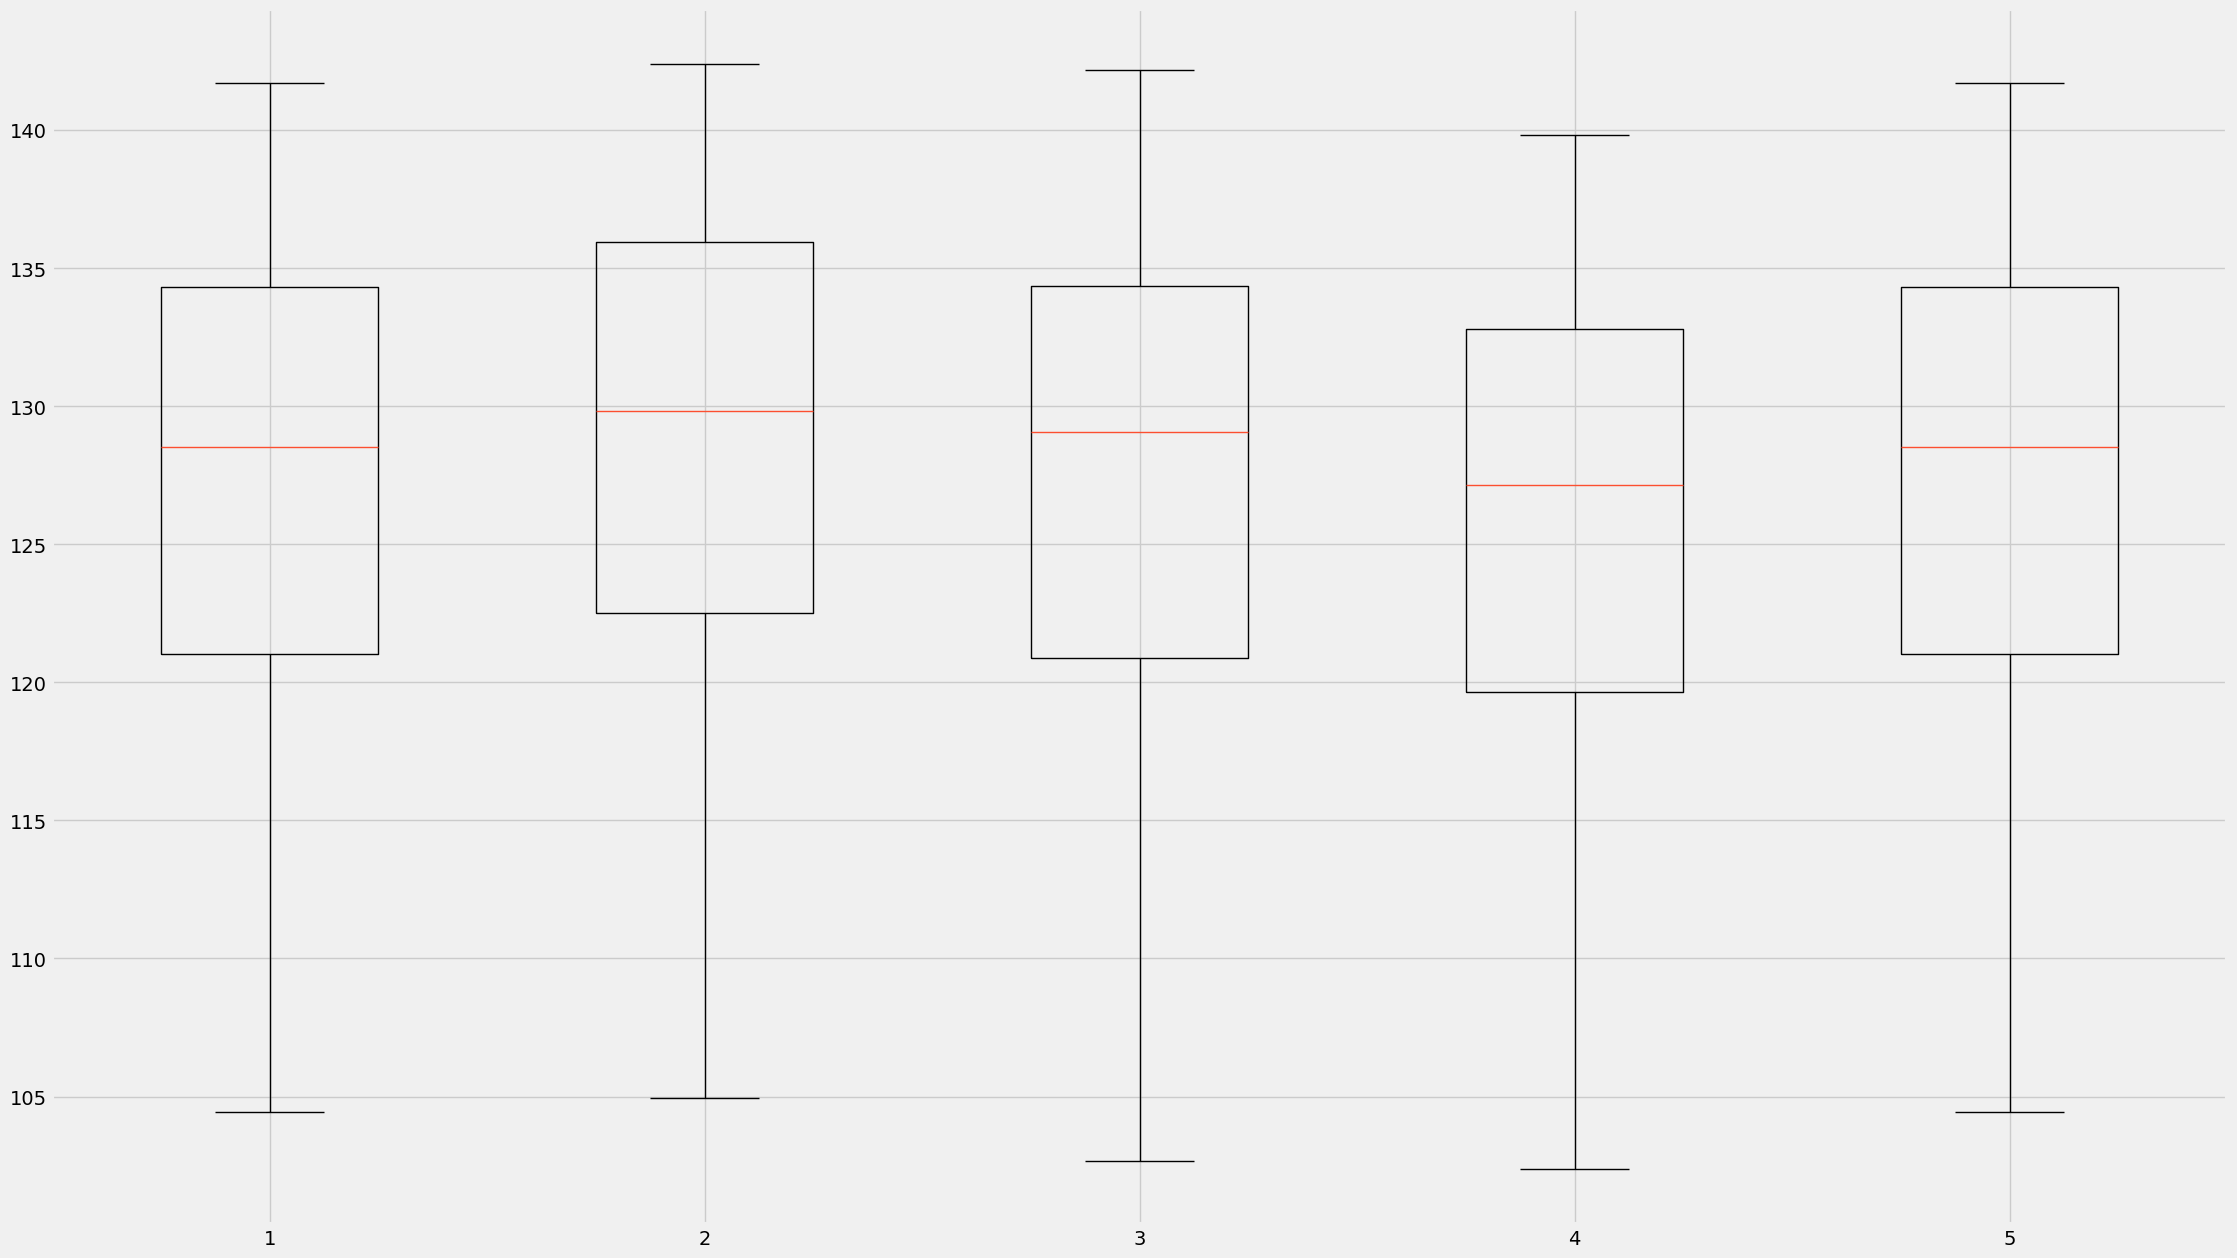

In [64]:
plt.figure(figsize=(25, 15))
plt.boxplot(stockprice_one_year[["Close", "High", "Open", "Low", "Adj Close"]])
plt.show()

In [65]:
data = df[["Date", "Open", "High", "Low", "Volume", "Adj Close"]]

In [66]:
df.set_index("Date", drop=False, inplace=True)

<Axes: xlabel='Date'>

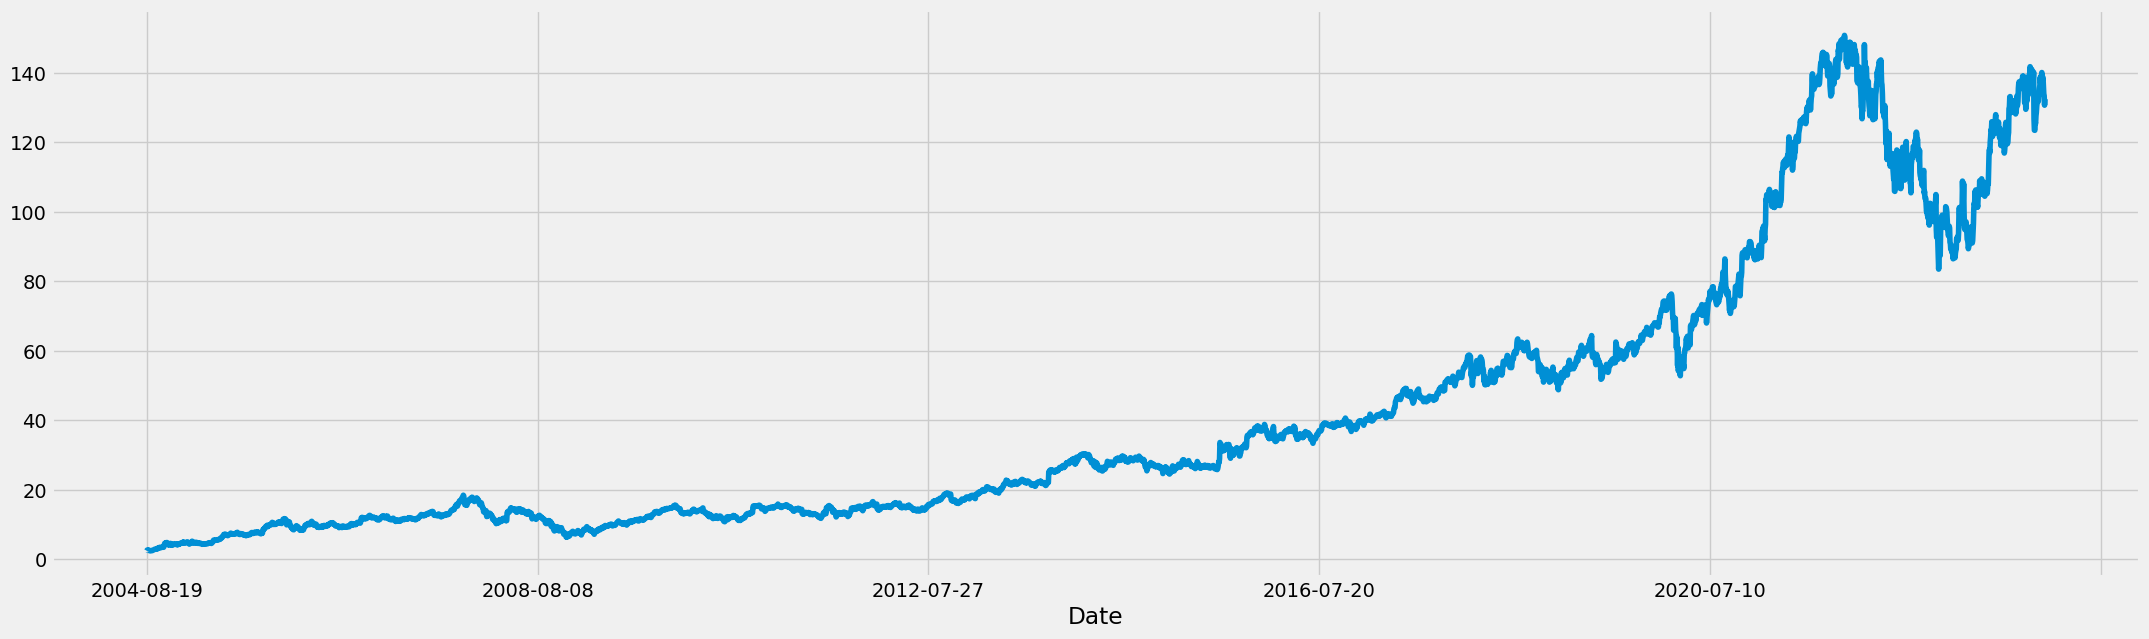

In [67]:
df.Close.plot(figsize=(24, 7))

<Axes: xlabel='Date'>

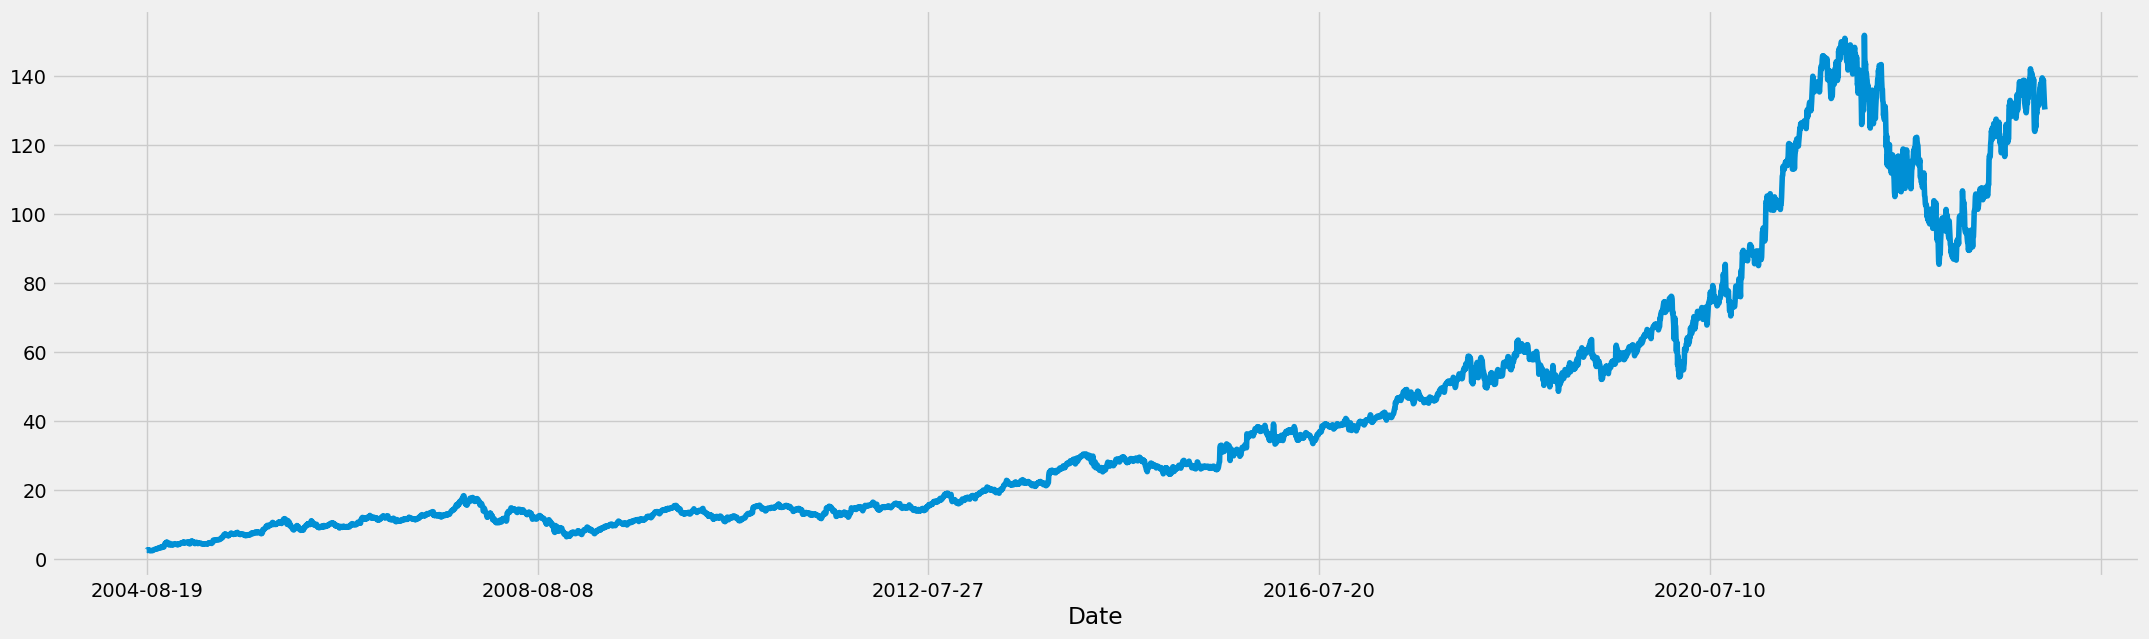

In [68]:
df.Open.plot(figsize=(24, 7))

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4858 entries, 2004-08-19 to 2023-12-05
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4858 non-null   object 
 1   Open       4858 non-null   float64
 2   High       4858 non-null   float64
 3   Low        4858 non-null   float64
 4   Close      4858 non-null   float64
 5   Adj Close  4858 non-null   float64
 6   Volume     4858 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 432.7+ KB


In [71]:
df.reset_index(drop=True, inplace=True)
lag_features = ["Open", "High", "Low", "Adj Close"]
window1 = 3
window2 = 7

df_rolled_3d = df[lag_features].rolling(window=window1, min_periods=0)
df_mean_3d = df_rolled_3d.mean().shift(1).reset_index().astype(np.float32)

df_rolled_7d = df[lag_features].rolling(window=window2)
df_mean_7d = df_rolled_7d.mean().shift(1).reset_index().astype(np.float32)
df_std_7d = df_rolled_7d.std().shift(1).reset_index().astype(np.float32)

for feature in lag_features:
    df[f"{feature}_mean_lag{window1}"] = df_mean_3d[feature].astype('float32')
    df[f"{feature}_std_lag{window2}"] = df_std_7d[feature].astype('float32')

In [73]:
df.fillna(df.select_dtypes(include=np.number).mean(), inplace=True)

In [74]:
df.set_index("Date", drop=False, inplace=True)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Open_mean_lag3,Open_std_lag7,High_mean_lag3,High_std_lag7,Low_mean_lag3,Low_std_lag7,Adj Close_mean_lag3,Adj Close_std_lag7
Date,,,,,,,,,,,,,,,
2004-08-19,2004-08-19,2.490664,2.591785,2.390042,2.499133,2.499133,897427216,41.432213,0.719995,41.871525,0.678637,41.010899,0.708671,41.449131,0.727059
2004-08-20,2004-08-20,2.515820,2.716817,2.503118,2.697639,2.697639,458857488,2.490664,0.719995,2.591785,0.678637,2.390042,0.708671,2.499133,0.727059
2004-08-23,2004-08-23,2.758411,2.826406,2.716070,2.724787,2.724787,366857939,2.503242,0.719995,2.654301,0.678637,2.446580,0.708671,2.598386,0.727059
2004-08-24,2004-08-24,2.770615,2.779581,2.579581,2.611960,2.611960,306396159,2.588298,0.719995,2.711669,0.678637,2.536410,0.708671,2.640520,0.727059
2004-08-25,2004-08-25,2.614201,2.689918,2.587302,2.640104,2.640104,184645512,2.681615,0.719995,2.774268,0.678637,2.599590,0.708671,2.678129,0.727059


In [75]:
df.Date = pd.to_datetime(df.Date, format="%Y-%m-%d")
df["month"] = df.Date.dt.month
df["day"] = df.Date.dt.day
df["dayofweek"] = df.Date.dt.dayofweek
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Open_mean_lag3,Open_std_lag7,High_mean_lag3,High_std_lag7,Low_mean_lag3,Low_std_lag7,Adj Close_mean_lag3,Adj Close_std_lag7,month,day,dayofweek
Date,,,,,,,,,,,,,,,,,,
2004-08-19,2004-08-19,2.490664,2.591785,2.390042,2.499133,2.499133,897427216,41.432213,0.719995,41.871525,0.678637,41.010899,0.708671,41.449131,0.727059,8,19,3
2004-08-20,2004-08-20,2.515820,2.716817,2.503118,2.697639,2.697639,458857488,2.490664,0.719995,2.591785,0.678637,2.390042,0.708671,2.499133,0.727059,8,20,4
2004-08-23,2004-08-23,2.758411,2.826406,2.716070,2.724787,2.724787,366857939,2.503242,0.719995,2.654301,0.678637,2.446580,0.708671,2.598386,0.727059,8,23,0
2004-08-24,2004-08-24,2.770615,2.779581,2.579581,2.611960,2.611960,306396159,2.588298,0.719995,2.711669,0.678637,2.536410,0.708671,2.640520,0.727059,8,24,1
2004-08-25,2004-08-25,2.614201,2.689918,2.587302,2.640104,2.640104,184645512,2.681615,0.719995,2.774268,0.678637,2.599590,0.708671,2.678129,0.727059,8,25,2


In [76]:
df_train = df[df.Date < "2023-01-01"]
df_valid = df[df.Date >= "2023-01-01"]

In [77]:
df_valid.shape

(233, 18)

In [78]:
!pip install keras
import tensorflow
from sklearn.preprocessing import MinMaxScaler

In [79]:
# date first five row print and T means Transpose the data
df_train.head().T

Date,2004-08-19,2004-08-20,2004-08-23,2004-08-24,2004-08-25
Date,2004-08-19 00:00:00,2004-08-20 00:00:00,2004-08-23 00:00:00,2004-08-24 00:00:00,2004-08-25 00:00:00
Open,2.490664,2.51582,2.758411,2.770615,2.614201
High,2.591785,2.716817,2.826406,2.779581,2.689918
Low,2.390042,2.503118,2.71607,2.579581,2.587302
Close,2.499133,2.697639,2.724787,2.61196,2.640104
Adj Close,2.499133,2.697639,2.724787,2.61196,2.640104
Volume,897427216,458857488,366857939,306396159,184645512
Open_mean_lag3,41.432213,2.490664,2.503242,2.588298,2.681615
Open_std_lag7,0.719995,0.719995,0.719995,0.719995,0.719995
High_mean_lag3,41.871525,2.591785,2.654301,2.711669,2.774268


In [120]:
# scaliing and transforing the data
y_train  =df_train["Close"]
scaller = MinMaxScaler(feature_range=(0, 1))
y_train = scaller.fit_transform(np.array(df_train['Close']).reshape(-1, 1))
y_train = df_train["Close"].to_numpy().reshape(-1, 1)

In [111]:
# Scaling and transforming the data for the validation set
# Use the 'scaller' that was already fitted on the training data in cell bfaIWmLhRkrH
y_valid_scaled = scaller.transform(np.array(df_valid['Close']).reshape(-1, 1))

# Keep unscaled validation data if needed for later comparison
y_valid_unscaled = df_valid["Close"].to_numpy().reshape(-1, 1)

In [104]:

X_train = df_train.drop(columns=["Date", "Close"])
X_valid = df_valid.drop(columns=["Date", "Close"])

feature_scaler = MinMaxScaler(feature_range=(0, 1))

X_train_scaled = feature_scaler.fit_transform(X_train)
X_valid_scaled = feature_scaler.transform(X_valid)

In [105]:
y_train = y_train.reshape(-1, 1)
y_valid1 = y_valid1.reshape(-1, 1)

In [107]:
!pip install xgboost
import xgboost as xgb
import sklearn
from xgboost import XGBRegressor
from xgboost import plot_importance

In [123]:
# model training gradient boost tree based algorithm
xgb = XGBRegressor(n_estimators=1000, learning_rate=0.01)

xgb.fit(
    X_train_scaled,
    y_train,
    eval_set=[(X_train_scaled, y_train), (X_valid_scaled, y_valid_scaled)],
    verbose=True
)

[0]	validation_0-rmse:34.87882	validation_1-rmse:37.65226
[1]	validation_0-rmse:34.53312	validation_1-rmse:38.45758
[2]	validation_0-rmse:34.19078	validation_1-rmse:39.25087
[3]	validation_0-rmse:33.85185	validation_1-rmse:40.03698
[4]	validation_0-rmse:33.51630	validation_1-rmse:40.81594
[5]	validation_0-rmse:33.18416	validation_1-rmse:41.59226
[6]	validation_0-rmse:32.85525	validation_1-rmse:42.35470
[7]	validation_0-rmse:32.52970	validation_1-rmse:43.12146
[8]	validation_0-rmse:32.20731	validation_1-rmse:43.86545
[9]	validation_0-rmse:31.88814	validation_1-rmse:44.60683
[10]	validation_0-rmse:31.57214	validation_1-rmse:45.33914
[11]	validation_0-rmse:31.25934	validation_1-rmse:46.07286
[12]	validation_0-rmse:30.94961	validation_1-rmse:46.78872
[13]	validation_0-rmse:30.64295	validation_1-rmse:47.50310
[14]	validation_0-rmse:30.33936	validation_1-rmse:48.20748
[15]	validation_0-rmse:30.03883	validation_1-rmse:48.91810
[16]	validation_0-rmse:29.74125	validation_1-rmse:49.60770
[17]	va

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.01, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=1000,
             n_jobs=None, num_parallel_tree=None, ...)

<Axes: title={'center': 'Feature importance'}, xlabel='Importance score', ylabel='Features'>

<Figure size 1200x800 with 0 Axes>

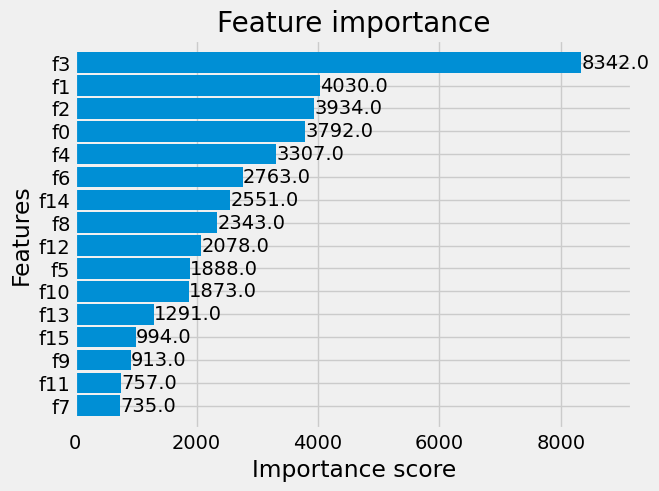

In [124]:
plt.figure(figsize=(12, 8))
feature_importance = plot_importance(xgb, height=0.9)
feature_importance

In [126]:
predicted_results_v = xgb.predict(X_valid_scaled)
predicted_results_t = xgb.predict(X_train_scaled)

predicted_results_v = predicted_results_v.reshape(-1, 1)
predicted_results_t = predicted_results_t.reshape(-1, 1)

predicted_results_v = scaller.inverse_transform(predicted_results_v)
predicted_results_t = scaller.inverse_transform(predicted_results_t)

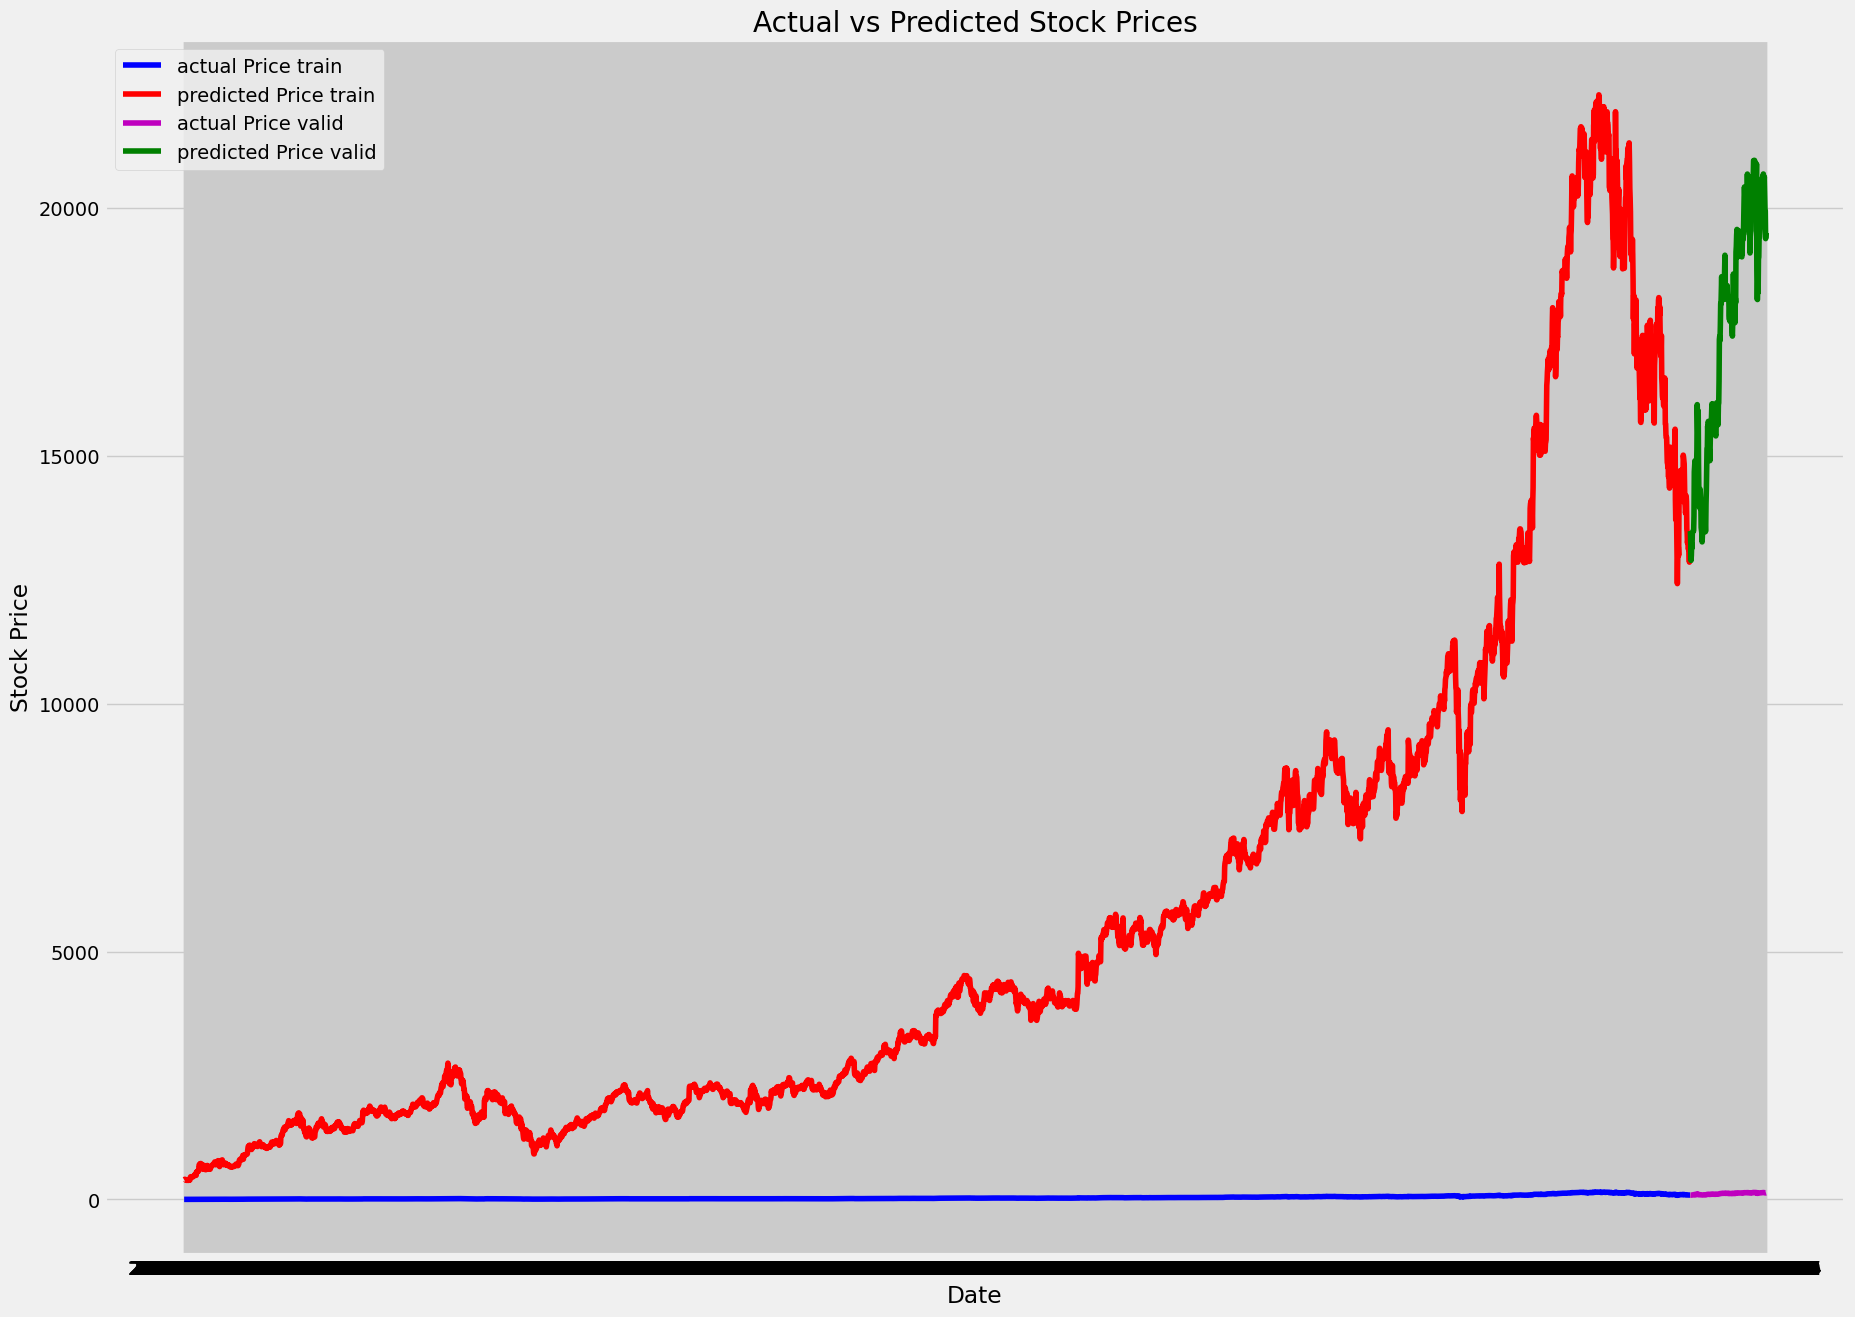

In [128]:
plt.figure(figsize=(20,15))

plt.plot(X_train.index, list(y_train), label="actual Price train", color='b')
plt.plot(X_train.index, list(predicted_results_t), label="predicted Price train", color='r')

plt.plot(X_valid.index, list(y_valid_unscaled), label="actual Price valid", color='m')
plt.plot(X_valid.index, list(predicted_results_v), label="predicted Price valid",color='g')

plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Actual vs Predicted Stock Prices')
plt.legend()
plt.show()

In [129]:
# model training gradient boost tree based algorithm
xgb = XGBRegressor(n_estimators=1000, learning_rate=0.0099)

xgb.fit(
    X_train_scaled,
    y_train,
    eval_set=[(X_train_scaled, y_train), (X_valid_scaled, y_valid_scaled)],
    verbose=True
)

[0]	validation_0-rmse:34.88232	validation_1-rmse:37.64418
[1]	validation_0-rmse:34.54003	validation_1-rmse:38.44152
[2]	validation_0-rmse:34.20105	validation_1-rmse:39.22700
[3]	validation_0-rmse:33.86541	validation_1-rmse:40.00547
[4]	validation_0-rmse:33.53308	validation_1-rmse:40.77693
[5]	validation_0-rmse:33.20409	validation_1-rmse:41.54583
[6]	validation_0-rmse:32.87828	validation_1-rmse:42.30107
[7]	validation_0-rmse:32.55576	validation_1-rmse:43.06066
[8]	validation_0-rmse:32.23633	validation_1-rmse:43.79777
[9]	validation_0-rmse:31.92006	validation_1-rmse:44.53235
[10]	validation_0-rmse:31.60691	validation_1-rmse:45.25803
[11]	validation_0-rmse:31.29690	validation_1-rmse:45.98517
[12]	validation_0-rmse:30.98989	validation_1-rmse:46.69469
[13]	validation_0-rmse:30.68591	validation_1-rmse:47.40279
[14]	validation_0-rmse:30.38493	validation_1-rmse:48.10107
[15]	validation_0-rmse:30.08695	validation_1-rmse:48.80560
[16]	validation_0-rmse:29.79188	validation_1-rmse:49.48936
[17]	va

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.0099, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=1000,
             n_jobs=None, num_parallel_tree=None, ...)

In [130]:
predicted_results_v = xgb.predict(X_valid_scaled)
predicted_results_t = xgb.predict(X_train_scaled)

predicted_results_v = predicted_results_v.reshape(-1, 1)
predicted_results_t = predicted_results_t.reshape(-1, 1)

predicted_results_v = scaller.inverse_transform(predicted_results_v)
predicted_results_t = scaller.inverse_transform(predicted_results_t)

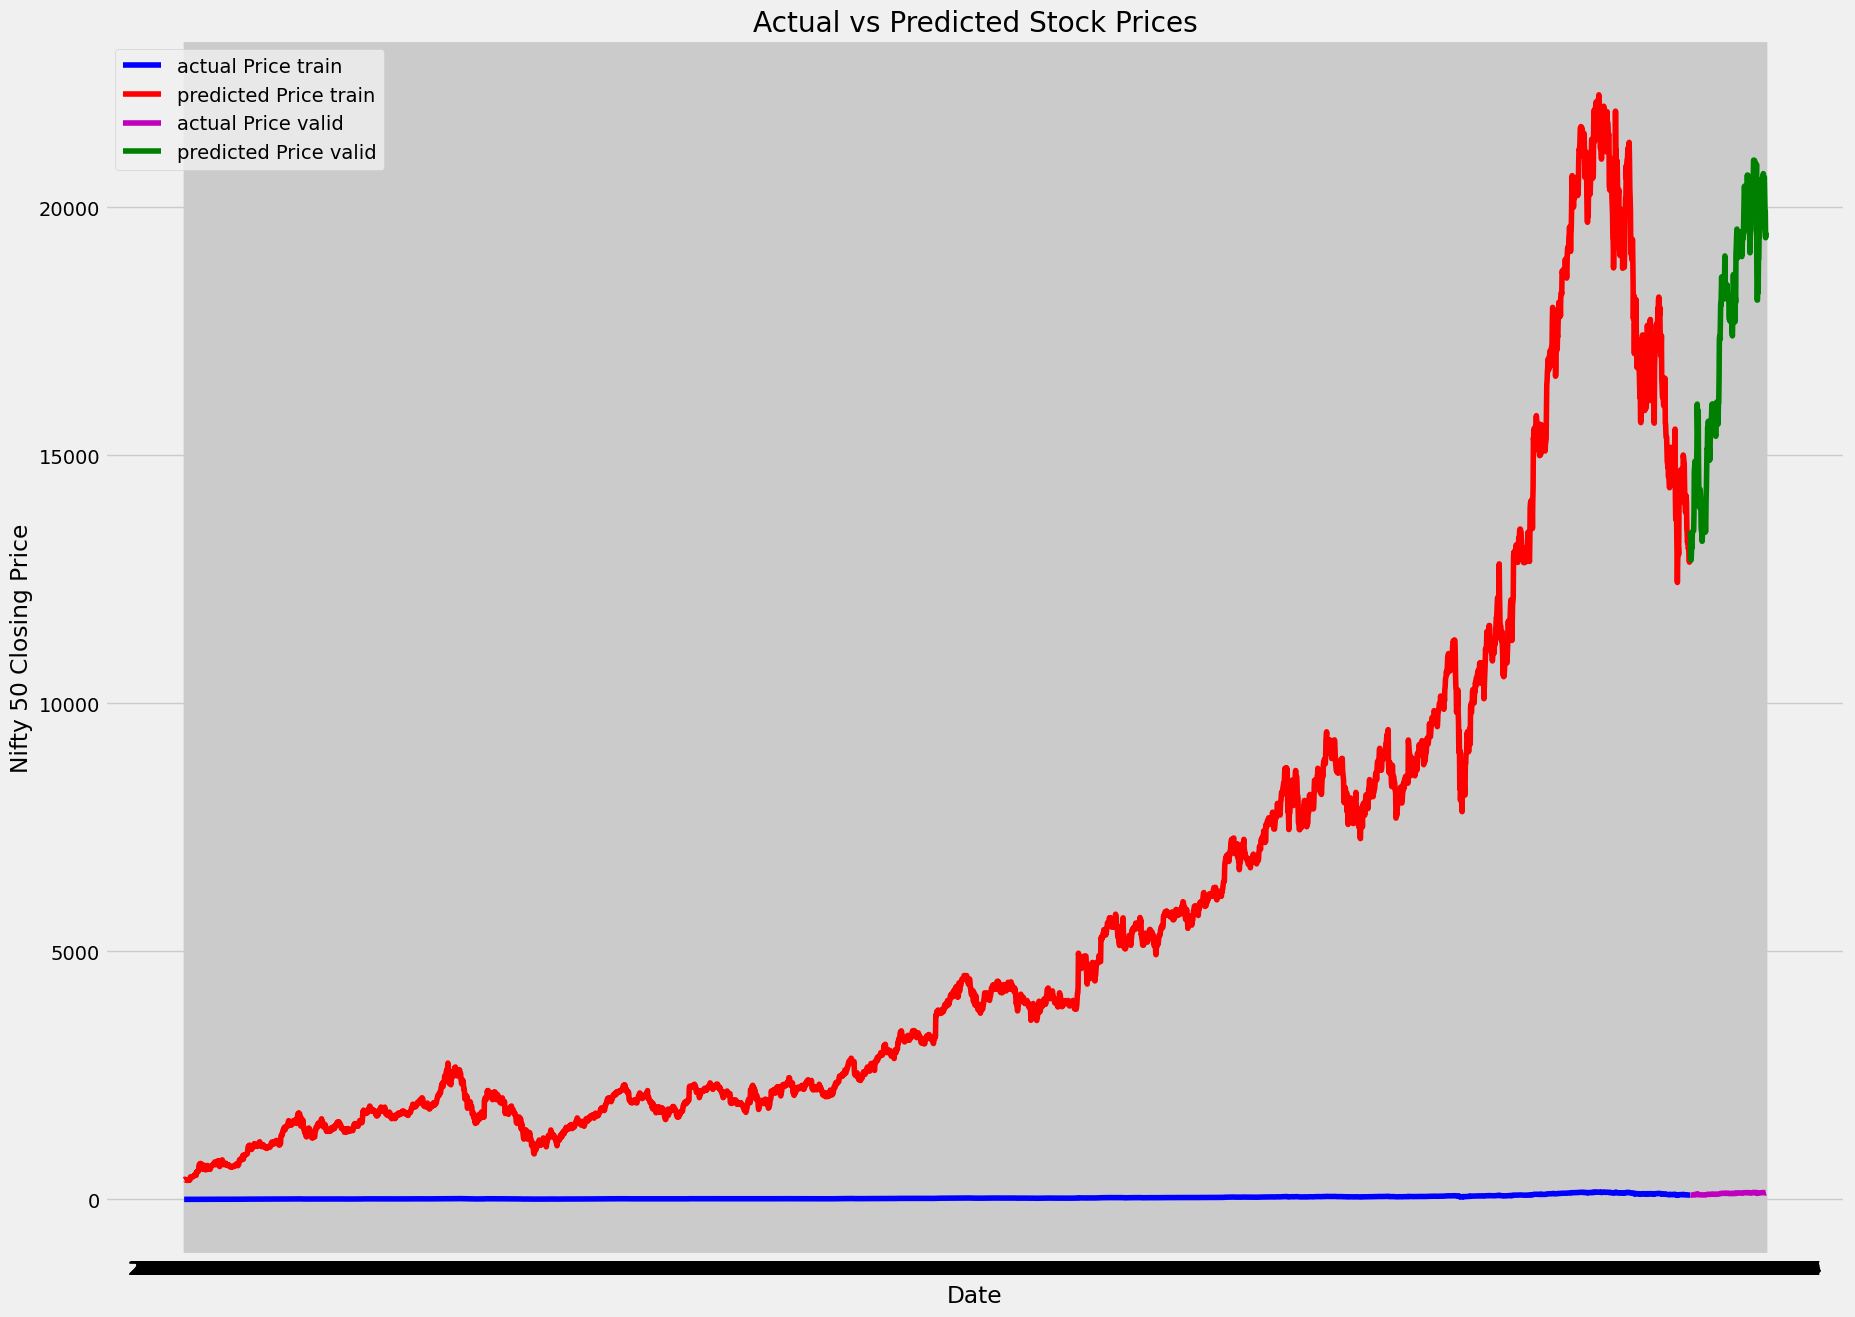

In [131]:
plt.figure(figsize=(20,15))

plt.plot(X_train.index, list(y_train), label="actual Price train", color='b')
plt.plot(X_train.index, list(predicted_results_t), label="predicted Price train", color='r')

plt.plot(X_valid.index, list(y_valid_unscaled), label="actual Price valid", color='m')
plt.plot(X_valid.index, list(predicted_results_v), label="predicted Price valid",color='g')

plt.xlabel('Date')
plt.ylabel('Nifty 50 Closing Price')
plt.title('Actual vs Predicted Stock Prices')
plt.legend()
plt.show()